In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\CHK\\Desktop\\Final_Project\\data\\KB_Crawl_data_10000.csv')

# 1. 데이터 전처리

1) Null값 삭제

In [42]:
df['VTYPE'].unique()

array(['대형', 'SUV', '트럭', '경차', '승합', '소형', '준중형', '중형', '스포츠카', '버스',
       'RV', '특수', 0], dtype=object)

In [3]:
domestic_cars = ['기아', '현대', 'KG모빌리티', '르노코리아', '쉐보레', 'GM대우', '제네시스', '르노삼성', '대우', '쌍용', '기타', '한국GM']
foreign_cars = ['폭스바겐', '벤츠', '링컨', '지프', '미니', 'BMW', '혼다', '닷지', '아우디', '볼보',
                '사브', '포드', '닛산', '스즈키', '렉서스', '랜드로버', '기타', '미쓰비시', '쉐보레', '푸조',
                '토요타', '재규어', '캐딜락', '포르쉐', '인피니티', '마세라티', '알파로메오', '크라이슬러',
                '마쯔다', '허머', '벤틀리', '롤스로이스', '스마트', '미쯔오카', '테슬라', '마이바흐', '이베코',
                'GMC', '람보르기니', '페라리', '도요타', '애스턴마틴', '피아트', '맥라렌', 'DS', '알핀',
                '시트로엥', '모건', '뷰익', '로버', '다이하쓰', '동풍소콘', '로터스', '부가티', '미쯔비시']

In [10]:
import pandas as pd
df = pd.read_csv('C:\\Users\\CHK\\Desktop\\Final_Project\\data\\KB_Crawl_data_10000.csv')

df.replace('없음', 0, inplace=True)
df.dropna(subset=['MNAME', 'VTYPE', 'PRICE'], inplace=True)
df.fillna(0, inplace=True)

df['US_HIS'] = df['US_HIS'].str.replace('회', '').astype(float)
df['FD_HIS'] = df['FD_HIS'].str.replace('회', '').astype(float)
df.fillna(0, inplace=True)
df['MILEAGE'] = df['MILEAGE'].str.replace('km', '').str.replace(',', '')
df['PRICE'] = df['PRICE'].str.replace('만원', '').str.replace(',', '')
df['DISP'] = df['DISP'].str.replace('cc', '').str.replace(',', '')
df['TRANS'] = df['TRANS'].str.replace('cc', '').str.replace(',', '')
df['MNAME'] = df['MNAME'].str.replace('실차주', '').str.replace('직거래', '')
df['MNAME'] = df['MNAME'].apply(lambda x: x.strip() if isinstance(x, str) else x)
df['MYERAR'] = df['MYERAR'].apply(lambda x: '19' + x[:2] if int(x[:2]) > 24 else '20' + x[:2])
df['CU_HIS'] = df['CU_HIS'].replace('있음', True).replace(0, False)


# 'MANUF' 열 값 변경
df.loc[df['MNAME'].str.split().str[0].isin(foreign_cars), 'MANUF'] = '외제'
df.loc[df['MNAME'].str.split().str[0].isin(domestic_cars), 'MANUF'] = '국산'

# dummy_vtype1 = pd.get_dummies(df['TRANS'], prefix='TRANS')
# dummy_vtype2 = pd.get_dummies(df['F_TYPE'], prefix='F_TYPE')
# dummy_vtype3 = pd.get_dummies(df['COLOR'], prefix='COLOR')
# dummy_vtype4 = pd.get_dummies(df['MANUF'], prefix='MANUF')
# dummy_vtype2 = pd.get_dummies(df['F_TYPE'], prefix='F_TYPE')

# df = pd.concat([df, dummy_vtype1], axis=1)
# df = pd.concat([df, dummy_vtype2], axis=1)
# df = pd.concat([df, dummy_vtype3], axis=1)
# df = pd.concat([df, dummy_vtype4], axis=1)

# 해당 컬럼들의 데이터 타입을 int로 변환합니다.
columns_to_convert = ['MVD_HIS', 'AVD_HIS', 'FD_HIS', 'VT_HIS', 'US_HIS']
df[columns_to_convert] = df[columns_to_convert].astype(int)


df.drop(columns=['TRANS', 'F_TYPE', 'VNUM', 'LINK', 'COLOR',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'], inplace=True)
df

C:\Users\CHK\AppData\Local\Temp\ipykernel_19744\3389230940.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CU_HIS'] = df['CU_HIS'].replace('있음', True).replace(0, False)


,SEQ,MNAME,PRICE,MYERAR,MILEAGE,DISP,VTYPE,CU_HIS,MVD_HIS,AVD_HIS,FD_HIS,VT_HIS,US_HIS,MANUF
0,1,기아 오피러스 프리미엄 GH270 스페셜 럭셔리,580,2009,94800,2700,대형,False,0,0,0,0,3,국산
1,2,링컨 뉴 MKX 2.7 리저브,2250,2017,68000,2694,SUV,False,0,0,0,0,0,외제
2,3,현대 제네시스 BH380 ROYAL VIP팩,730,2008,179000,3778,대형,False,0,0,0,0,4,국산
3,4,현대 제네시스 BH330 LUXURY 기본형,850,2011,178000,3342,대형,False,0,0,0,0,2,국산
4,5,현대 포터2 카고,650,2016,188051,0,트럭,False,0,0,0,0,1,국산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,미니 쿠퍼 S 2.0 기본형,1640,2019,99432,1998,소형,False,0,0,0,0,3,외제
9996,9997,미니 뉴 컨트리맨 (F60) 2.0 Cooper JCW All4 기본형,2370,2019,69544,1998,소형,False,0,0,0,0,4,외제
9997,9998,한국GM 쉐보레 볼트 1.5,1390,2018,131512,1490,소형,False,0,0,0,0,3,국산
9998,9999,기아 쏘울 1.6 스마트 기본형,560,2010,113517,1591,준중형,False,0,0,0,0,8,국산


In [11]:
df2 = df[df['MANUF'] == '국산']

In [12]:
df2

,SEQ,MNAME,PRICE,MYERAR,MILEAGE,DISP,VTYPE,CU_HIS,MVD_HIS,AVD_HIS,FD_HIS,VT_HIS,US_HIS,MANUF
0,1,기아 오피러스 프리미엄 GH270 스페셜 럭셔리,580,2009,94800,2700,대형,False,0,0,0,0,3,국산
2,3,현대 제네시스 BH380 ROYAL VIP팩,730,2008,179000,3778,대형,False,0,0,0,0,4,국산
3,4,현대 제네시스 BH330 LUXURY 기본형,850,2011,178000,3342,대형,False,0,0,0,0,2,국산
4,5,현대 포터2 카고,650,2016,188051,0,트럭,False,0,0,0,0,1,국산
5,6,한국GM 쉐보레 스파크 밴 2인승 밴,230,2015,164960,995,경차,False,0,0,0,0,1,국산
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9993,기아 디 올 뉴 스포티지 D2.0 2WD 트렌디,2390,2021,72162,0,SUV,True,0,0,0,0,1,국산
9994,9995,현대 아반떼AD 1.6 GDi Value Plus,1190,2018,82286,0,준중형,True,0,0,0,0,4,국산
9997,9998,한국GM 쉐보레 볼트 1.5,1390,2018,131512,1490,소형,False,0,0,0,0,3,국산
9998,9999,기아 쏘울 1.6 스마트 기본형,560,2010,113517,1591,준중형,False,0,0,0,0,8,국산


In [13]:
df2.to_csv('pre-processed data.csv')

In [32]:
df2.dtypes

SEQ         int64
MNAME      object
PRICE      object
MYERAR     object
MILEAGE    object
DISP       object
VTYPE      object
CU_HIS       bool
MVD_HIS     int32
AVD_HIS     int32
FD_HIS      int32
VT_HIS      int32
US_HIS      int32
MANUF      object
dtype: object

2. VTYPE별로 df 분할

In [14]:
processed_df = pd.read_csv('pre-processed data.csv')
processed_df.drop(columns='Unnamed: 0', inplace=True)
processed_df.columns

Index(['SEQ', 'MNAME', 'PRICE', 'MYERAR', 'MILEAGE', 'DISP', 'VTYPE', 'CU_HIS',
       'MVD_HIS', 'AVD_HIS', 'FD_HIS', 'VT_HIS', 'US_HIS', 'MANUF'],
      dtype='object')

In [15]:
for vtype in processed_df['VTYPE'].unique():
    globals()[vtype] = processed_df[processed_df['VTYPE'] == vtype]

In [16]:
df['VTYPE'].unique()

array(['대형', 'SUV', '트럭', '경차', '승합', '소형', '준중형', '중형', '스포츠카', '버스',
       'RV', '특수'], dtype=object)

In [17]:
len_dic = {'대형': len(대형), 'SUV': len(SUV), '트럭': len(트럭), '경차': len(경차), '승합': len(승합), 
           '소형': len(소형), '준중형': len(준중형), '중형': len(중형), '스포츠카': len(스포츠카), '버스': len(버스),
           'RV': len(RV), '특수': len(특수)}
len_dic

{'대형': 1632,
 'SUV': 2125,
 '트럭': 936,
 '경차': 541,
 '승합': 350,
 '소형': 112,
 '준중형': 563,
 '중형': 1084,
 '스포츠카': 9,
 '버스': 10,
 'RV': 575,
 '특수': 6}

In [18]:
processed_df.columns

Index(['SEQ', 'MNAME', 'PRICE', 'MYERAR', 'MILEAGE', 'DISP', 'VTYPE', 'CU_HIS',
       'MVD_HIS', 'AVD_HIS', 'FD_HIS', 'VT_HIS', 'US_HIS', 'MANUF'],
      dtype='object')

In [19]:
대형.to_csv('원데이터.csv')

3) 모델링

In [20]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 특성(feature)과 타겟 변수(target)로 데이터를 나눕니다.
X = 대형.drop(columns=['SEQ', 'PRICE', 'MNAME', 'VTYPE', 'MANUF'])
y = 대형['PRICE']

# 훈련 세트와 테스트 세트로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.dtypes
X_train.to_csv('train')

In [21]:
# XGBoost 회귀 모델을 생성합니다.
model = XGBRegressor()

# 모델을 훈련합니다.
model.fit(X_train, y_train)

# 테스트 세트로 모델을 평가합니다.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 테스트 데이터셋에 대한 예측 수행
y_pred = model.predict(X_test)

# 실제값과 예측값 동시 출력
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


Mean Squared Error: 259110.72282562926
      Actual    Predicted
3335     959   996.094177
7920     340   354.780975
2638    1190  1227.517456
2480    1360  1365.899048
4412    1950  2018.957886
...      ...          ...
6325     420    55.964874
1556    1300  1298.349121
917     1750  1491.904297
1564    1080  1127.237427
4687     550   554.742065

[327 rows x 2 columns]


In [22]:
# 테스트 데이터셋에 대한 예측 수행
y_pred = model.predict(X_test)

# 실제값과 예측값 동시 출력
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


      Actual    Predicted
3335     959   996.094177
7920     340   354.780975
2638    1190  1227.517456
2480    1360  1365.899048
4412    1950  2018.957886
...      ...          ...
6325     420    55.964874
1556    1300  1298.349121
917     1750  1491.904297
1564    1080  1127.237427
4687     550   554.742065

[327 rows x 2 columns]


In [27]:
import pandas as pd

data = {
    'MYERAR': [2009],
    'MILEAGE': [95800],
    'DISP': [2700],
    'CU_HIS': [False],
    'MVD_HIS': [0],
    'AVD_HIS': [0],
    'FD_HIS': [0],
    'VT_HIS': [0],
    'US_HIS': [9],
}

df_similar = pd.DataFrame(data)
print(df_similar)

y_pred_new = model.predict(df_similar)

# 예측값 출력
print("새로운 데이터에 대한 예측값:", y_pred_new)

   MYERAR  MILEAGE  DISP  CU_HIS  MVD_HIS  AVD_HIS  FD_HIS  VT_HIS  US_HIS
0    2009    95800  2700   False        0        0       0       0       9
새로운 데이터에 대한 예측값: [458.95795]


In [240]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# 특성(feature)과 타겟 변수(target)로 데이터를 나눕니다.
X = SUV.drop(columns=['SEQ', 'PRICE', 'MNAME', 'VTYPE'])
y = SUV['PRICE']

# 훈련 세트와 테스트 세트로 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 회귀 모델을 생성합니다.
model = XGBRegressor()

# 모델을 훈련합니다.
model.fit(X_train, y_train)

# 테스트 세트로 모델을 평가합니다.
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# 테스트 데이터셋에 대한 예측 수행
y_pred = model.predict(X_test)

# 실제값과 예측값 동시 출력
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)


Mean Squared Error: 419961.0884469298
      Actual    Predicted
2331    1650  1755.712158
1437    1390  1336.902710
8729    1730  1708.743896
2449     980   896.904236
6341    1699  1590.755493
...      ...          ...
1253    3900  5173.306641
6819    1050  1200.956055
3276    1230  1397.670044
7475    1950  2036.889160
8657    1880  1911.880859

[544 rows x 2 columns]


상위 9개 특성:
1. MYERAR - 0.586
2. DISP - 0.248
3. CU_HIS - 0.072
4. MILEAGE - 0.057
5. US_HIS - 0.037
6. VT_HIS - 0.000
7. FD_HIS - 0.000
8. AVD_HIS - 0.000
9. MVD_HIS - 0.000


C:\Users\CHK\AppData\Local\Temp\ipykernel_19744\1658158163.py:21: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  plt.tight_layout()
C:\Users\CHK\AppData\Local\Temp\ipykernel_19744\1658158163.py:21: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from current font.
  plt.tight_layout()
C:\Users\CHK\AppData\Local\Temp\ipykernel_19744\1658158163.py:21: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  plt.tight_layout()
C:\Users\CHK\AppData\Local\Temp\ipykernel_19744\1658158163.py:21: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  plt.tight_layout()
C:\Users\CHK\AppData\Local\Temp\ipykernel_19744\1658158163.py:21: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  plt.tight_layout()
C:\Users\CHK\AppData\Local\Temp\ipykernel_19744\1658158163.py:21: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  plt.tight_layout()
C:\Use

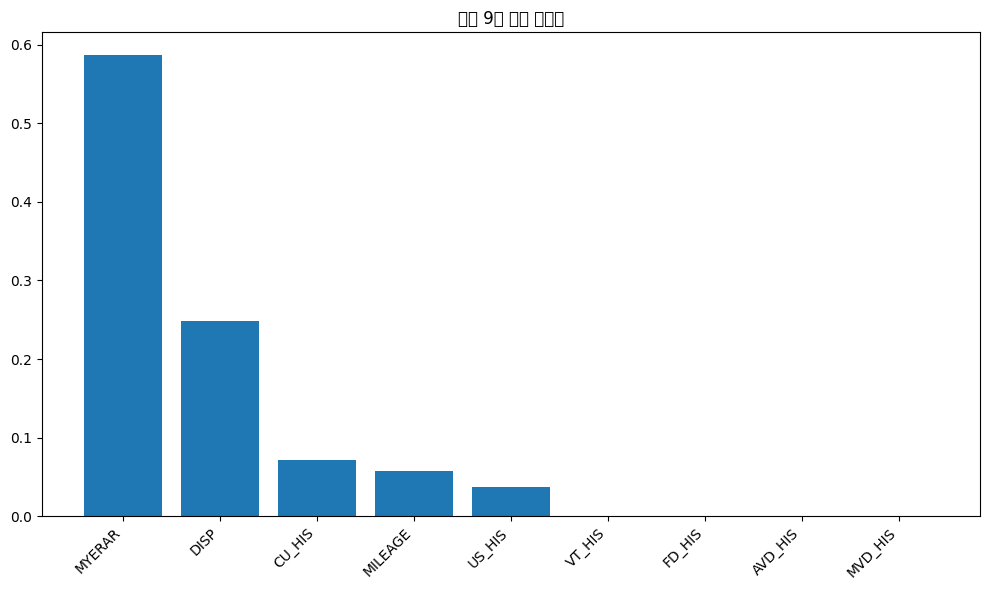

In [30]:
import xgboost as xgb
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_

# 중요도를 기준으로 내림차순 정렬하여 인덱스를 얻음
indices = np.argsort(importances)[::-1]

# 상위 10개 특성의 중요도와 이름 출력
top_features = 9
print("상위 {}개 특성:".format(top_features))
for i in range(top_features):
    print("{}. {} - {:.3f}".format(i + 1, X_train.columns[indices[i]], importances[indices[i]]))

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("상위 {}개 특성 중요도".format(top_features))
plt.bar(range(top_features), importances[indices[:top_features]], align="center")
plt.xticks(range(top_features), X_train.columns[indices[:top_features]], rotation=45, ha="right")
plt.tight_layout()
plt.show()